<a href="https://colab.research.google.com/github/BKHV/risk_models/blob/master/LGD%20competition%20baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Бэйзлайн по разработке LGD модели
Loss given default (LGD) объем активов Банка, который будет утерян в случае дефолта клиента, вычисляется как доля от задолженности на момент дефолта. Для задания подготовлен ситнетический набор данных

### Импортируем библиотеки

In [11]:
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from math import log
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

### Подгружаем данные

In [19]:
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
!wget https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv

--2021-03-10 17:38:20--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 411713 (402K) [text/plain]
Saving to: ‘LGD-data-train.csv’

LGD-data-train.csv  100%[===================>] 402.06K  --.-KB/s    in 0.03s   

2021-03-10 17:38:20 (13.0 MB/s) - ‘LGD-data-train.csv’ saved [411713/411713]

--2021-03-10 17:38:20--  https://raw.githubusercontent.com/BKHV/risk_models/master/data/LGD-data-test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275020 (

In [20]:
train_df = pd.read_csv('LGD-data-train.csv')
test_df = pd.read_csv('LGD-data-test.csv')

ParserError: ignored

In [ ]:
train_df.head()

,symbol,name,issue_date,EPS,QuoteLast,Price200DayAverage,Price52WeekPercChange,PriceToBook,MarketCap,PE,DividendRecentQuarter,DividendNextQuarter,DPSRecentYear,IAD,DividendPerShare,DividendYield,Dividend,BookValuePerShareYear,CashPerShareYear,CurrentRatioYear,LTDebtToAssetsYear,LTDebtToAssetsQuarter,TotalDebtToAssetsYear,TotalDebtToAssetsQuarter,LTDebtToEquityYear,LTDebtToEquityQuarter,TotalDebtToEquityYear,TotalDebtToEquityQuarter,AINTCOV,ReturnOnInvestmentTTM,ReturnOnInvestment5Years,ReturnOnInvestmentYear,ReturnOnAssetsTTM,ReturnOnAssets5Years,ReturnOnAssetsYear,ReturnOnEquityTTM,ReturnOnEquity5Years,ReturnOnEquityYear,Beta,Float,InstitutionalPercentHeld,GrossMargin,EBITDMargin,OperatingMargin,NetProfitMarginPercent,NetIncomeGrowthRate5Years,RevenueGrowthRate5Years,RevenueGrowthRate10Years,EPSGrowthRate5Years,EPSGrowthRate10Years,Volume,AverageVolume,LGD
0,GMI,Sandon Capital Investments Ltd,31/01/2010,0.03,0.00,0.88,14.62,1.04,0.0,0.00,0.03,0.03,0.05,0.05,0.05,5.10,2.02,0.95,0.96,52.05,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,5.69,0.36,5.69,5.62,0.35,5.62,5.77,0.37,5.77,0.00,37.18,0.0,66.57,64.05,64.05,47.54,13.43,21.43,14.09,16.63,7.25,0,52847,1.077790
1,SO4,Salt Lake Potash Ltd,31/12/2014,0.04,0.60,0.43,211.90,9.33,80400000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.07,0.06,12.31,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,62.18,21.71,62.18,58.76,21.05,58.76,62.18,22.63,62.18,0.56,79.44,0.0,0.00,5965.13,6367.40,6367.42,0.00,38.36,0.00,0.00,0.00,436230,102084,1.048031
2,WRGN,WATER RES DEF,31/05/2011,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0.392984
3,MUS,OGI Group Ltd,31/10/2013,0.00,0.06,0.00,0.00,0.00,12280000.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.68,0.0,0.0,55.35,55.35,0.0,0.0,0.0,0.0,5.21,26.88,47.22,26.88,18.97,34.85,18.97,28.89,50.62,28.89,0.00,132.22,0.0,31.90,113.48,242.22,242.22,0.00,30.79,2.31,0.00,0.00,152120000,8260000,0.834822
4,HFA,HFA Holdings Limited,31/01/2014,0.12,2.26,2.29,9.69,1.13,366450000.0,18.45,0.09,0.09,0.14,0.16,0.14,6.85,22.72,2.07,0.22,3.34,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,101.74,5.86,17.21,5.86,5.52,15.80,5.52,5.86,20.98,5.86,0.57,131.11,0.0,91.37,42.10,34.48,21.27,18.62,0.74,10.28,15.56,0.00,47426,85796,0.013493


In [ ]:
test_df.head()

,symbol,name,issue_date,EPS,QuoteLast,Price200DayAverage,Price52WeekPercChange,PriceToBook,MarketCap,PE,DividendRecentQuarter,DividendNextQuarter,DPSRecentYear,IAD,DividendPerShare,DividendYield,Dividend,BookValuePerShareYear,CashPerShareYear,CurrentRatioYear,LTDebtToAssetsYear,LTDebtToAssetsQuarter,TotalDebtToAssetsYear,TotalDebtToAssetsQuarter,LTDebtToEquityYear,LTDebtToEquityQuarter,TotalDebtToEquityYear,TotalDebtToEquityQuarter,AINTCOV,ReturnOnInvestmentTTM,ReturnOnInvestment5Years,ReturnOnInvestmentYear,ReturnOnAssetsTTM,ReturnOnAssets5Years,ReturnOnAssetsYear,ReturnOnEquityTTM,ReturnOnEquity5Years,ReturnOnEquityYear,Beta,Float,InstitutionalPercentHeld,GrossMargin,EBITDMargin,OperatingMargin,NetProfitMarginPercent,NetIncomeGrowthRate5Years,RevenueGrowthRate5Years,RevenueGrowthRate10Years,EPSGrowthRate5Years,EPSGrowthRate10Years,Volume,AverageVolume
0,AVM,Anvil Mining Ltd (CDI),31/08/2013,0.26,7.45,6.73,27.35,1.45,1.180000e+09,28.21,0.0,0.00,0.00,0.00,0.00,0.00,0.0,5.14,0.50,2.47,4.71,3.84,5.40,5.74,5.43,4.58,6.23,6.85,0.00,6.36,3.25,2.74,5.90,2.99,2.63,7.10,2.86,3.48,1.34,97.80,0.0,47.96,30.74,38.49,37.11,21.62,0.55,0.00,12.59,0.00,0,0
1,VRX,Ventnor Resources Ltd,28/02/2019,0.07,0.02,0.02,53.64,0.94,4.470000e+06,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,14.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,122.70,29.92,122.70,120.92,27.85,120.92,122.70,29.92,122.70,0.64,191.16,0.0,0.00,871.54,14523.16,14523.16,0.00,7.92,0.00,0.00,0.00,355154,42368
2,4CE,Force Commodities Ltd,31/05/2012,0.01,0.03,0.04,16.66,1.09,5.370000e+06,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.02,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.66,18.63,40.06,24.44,15.77,36.43,20.09,18.69,41.40,24.52,0.86,87.74,0.0,0.00,164.37,185.37,232.56,0.00,0.00,0.00,0.00,0.00,1750000,1580000
3,TPC,TPC Consolidated Ltd,30/09/2015,0.25,1.73,0.78,0.00,8.23,1.944000e+07,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.21,0.11,1.14,0.00,0.00,11.03,11.03,0.00,0.00,78.50,78.50,0.00,93.35,61.70,93.35,17.64,14.76,17.64,97.22,89.55,97.22,1.63,2.37,0.0,16.06,6.45,6.77,5.33,0.00,4.55,6.24,0.00,0.00,0,5550
4,VII,Vietnam Industrial Investment Limited,30/06/2011,0.08,0.40,0.26,0.00,1.16,5.691000e+07,5.13,0.0,0.03,0.03,0.02,0.03,5.25,0.0,0.34,0.44,1.41,0.00,0.00,42.16,40.91,0.00,0.00,119.90,106.41,5.62,28.57,5.55,28.48,10.26,1.71,9.61,22.66,3.50,23.11,0.00,7.52,0.0,13.25,7.31,5.78,4.18,7.44,6.29,36.04,7.44,50.04,0,7234


Выборка содержит информацию по 3047 клиентам Банка. 2041 наблюдение в выборке для разработки 1006 в тестовой выборке.

### График распределения фактического LGD

No handles with labels found to put in legend.


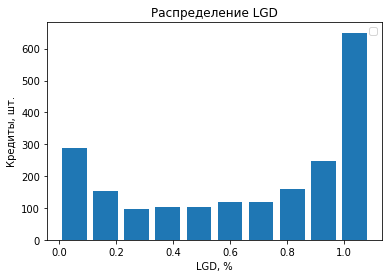

In [ ]:
import matplotlib.pyplot as plt
# bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(train_df['LGD'].values, histtype='bar', rwidth=0.8)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

Задача прогнозирования LGD - это задача регресии. Поэтому в качестве бейзлайна используем линейную регрессиию для предсказания.

Факторы возьмем экспертно, как те, которые потенциально должны оказывать влияние на LGD

In [ ]:
features = ['EPS', 'MarketCap','TotalDebtToEquityYear','GrossMargin']

In [ ]:
l_r = LinearRegression()

In [ ]:
l_r.fit(train_df[features], train_df['LGD'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Метрика MAE
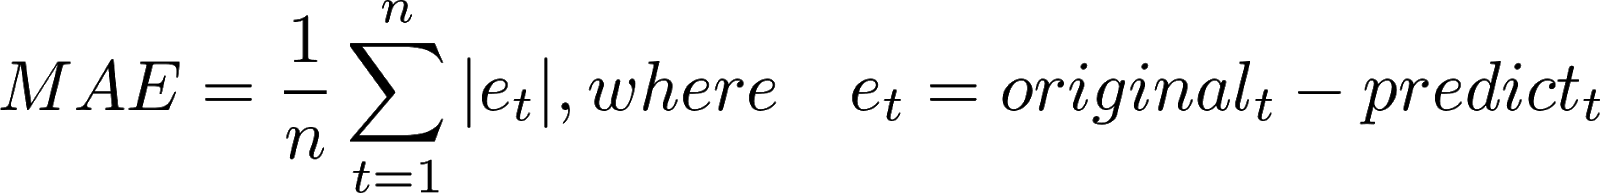


In [ ]:
mean_absolute_error(train_df['LGD'], l_r.predict(train_df[features]))

0.33444468553373075

No handles with labels found to put in legend.


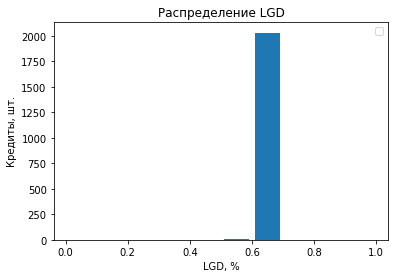

In [ ]:
import matplotlib.pyplot as plt
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(l_r.predict(train_df[features]), bins=bins, histtype='bar', rwidth=0.8)
plt.xlabel('LGD, %')
plt.ylabel('Кредиты, шт.')
plt.title('Распределение LGD')
plt.legend()
plt.show()

Текущая модель приблежает среднее, что неплохо для бейзлайна.

In [ ]:
predictions = l_r.predict(test_df[features])

In [ ]:
answ_df = test_df[['symbol']].copy()

In [ ]:
answ_df['predictions'] = predictions

In [ ]:
answ_df.head()

,symbol,predictions
0,AVM,0.659183
1,VRX,0.659985
2,4CE,0.659720
3,TPC,0.659700
4,VII,0.658326


In [ ]:
answ_df.to_csv('LGD-submit.csv', index=False)